In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf
%matplotlib inline

Using TensorFlow backend.


### 데이터 불러오기

In [6]:
# seed 값 설정 정닶값 재현 가능하도록
seed = 20
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 입력

df = pd.read_csv('../dataset/IRIS.csv')
df.columns=df.columns.str.lower()
df.head()

print(df["species"].drop_duplicates())

0          setosa
50     versicolor
100     virginica
Name: species, dtype: object


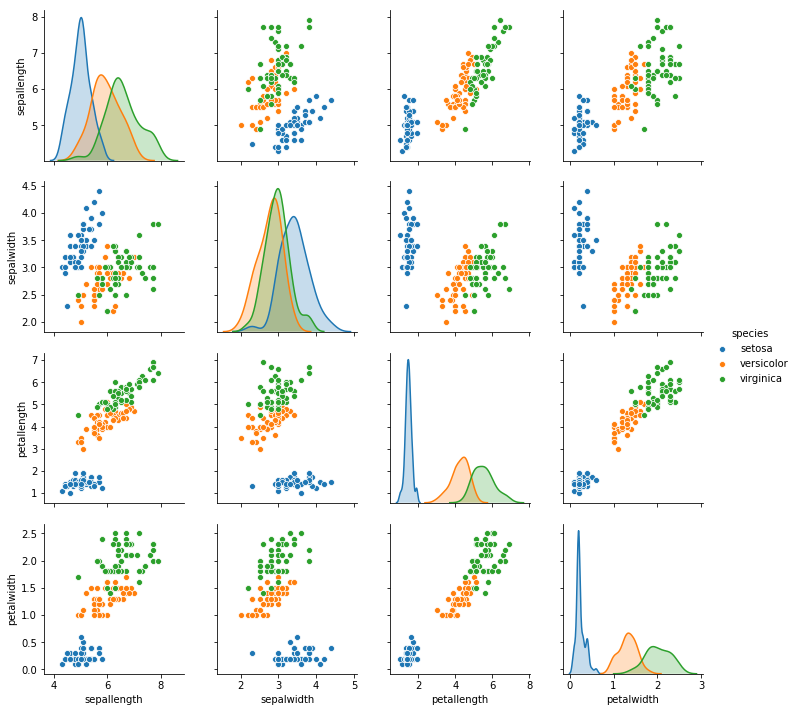

In [7]:
# 그래프로 확인

sns.pairplot(df, hue='species');
plt.show()


In [8]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [10]:


model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [11]:
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=20)
#train model
hist = model.fit(X_train, y_train, 
                 epochs=80, 
                 validation_split=0.2, callbacks=[early_stopping_monitor])

Instructions for updating:
Use tf.cast instead.
Train on 96 samples, validate on 24 samples
Epoch 1/80
96/96 [==============================] - 0s 3ms/step - loss: 1.0898 - acc: 0.2708 - val_loss: 0.9999 - val_acc: 0.2500
Epoch 2/80
96/96 [==============================] - 0s 62us/step - loss: 0.9801 - acc: 0.3958 - val_loss: 1.0463 - val_acc: 0.2500
Epoch 3/80
96/96 [==============================] - 0s 62us/step - loss: 0.9163 - acc: 0.4583 - val_loss: 1.0583 - val_acc: 0.5000
Epoch 4/80
96/96 [==============================] - 0s 83us/step - loss: 0.8641 - acc: 0.7292 - val_loss: 1.0061 - val_acc: 0.5417
Epoch 5/80
96/96 [==============================] - 0s 62us/step - loss: 0.8174 - acc: 0.7292 - val_loss: 0.9347 - val_acc: 0.5417
Epoch 6/80
96/96 [==============================] - 0s 73us/step - loss: 0.7685 - acc: 0.7292 - val_loss: 0.8678 - val_acc: 0.5417
Epoch 7/80
96/96 [==============================] - 0s 62us/step - loss: 0.7264 - acc: 0.7292 - val_loss: 0.8071 - val_acc:

Epoch 61/80
96/96 [==============================] - 0s 73us/step - loss: 0.1127 - acc: 0.9792 - val_loss: 0.1639 - val_acc: 0.9583
Epoch 62/80
96/96 [==============================] - 0s 62us/step - loss: 0.1114 - acc: 0.9792 - val_loss: 0.1616 - val_acc: 0.9583
Epoch 63/80
96/96 [==============================] - 0s 83us/step - loss: 0.1100 - acc: 0.9792 - val_loss: 0.1582 - val_acc: 1.0000
Epoch 64/80
96/96 [==============================] - 0s 52us/step - loss: 0.1081 - acc: 0.9792 - val_loss: 0.1561 - val_acc: 1.0000
Epoch 65/80
96/96 [==============================] - 0s 62us/step - loss: 0.1052 - acc: 0.9792 - val_loss: 0.1557 - val_acc: 0.9583
Epoch 66/80
96/96 [==============================] - 0s 62us/step - loss: 0.1040 - acc: 0.9792 - val_loss: 0.1533 - val_acc: 0.9583
Epoch 67/80
96/96 [==============================] - 0s 83us/step - loss: 0.1025 - acc: 0.9792 - val_loss: 0.1522 - val_acc: 0.9583
Epoch 68/80
96/96 [==============================] - 0s 62us/step - loss: 0.

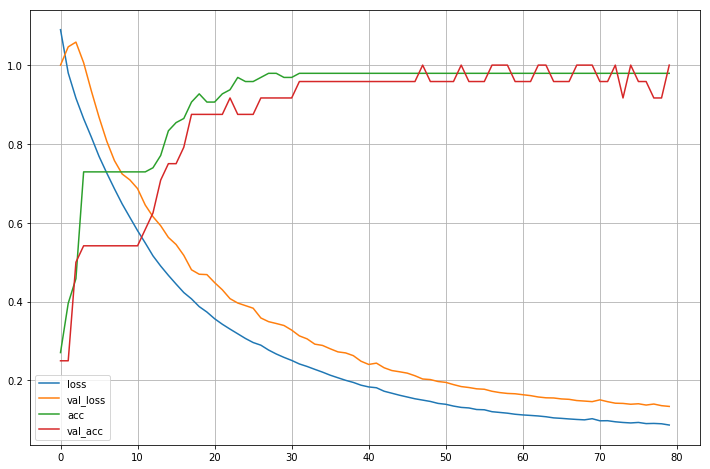

In [13]:

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

30/30 [==============================] - 0s 33us/step
Accuracy = 0.97


In [15]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


### 실습 customerData

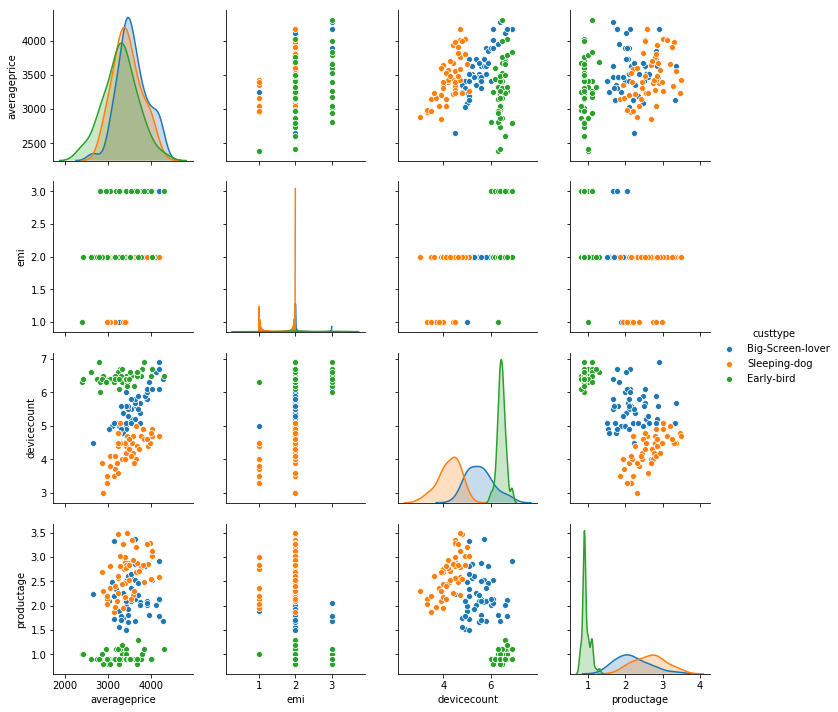

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________
Train on 96 samples, validate on 24 samples
Epoch 1/1000
96/96 [==============================] - 0s 3ms/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 2/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 3/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0

96/96 [==============================] - 0s 52us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 56/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 57/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 58/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 59/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 60/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 61/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 62/1000
96/96 [==============================] - 0s 83us

96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 116/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 117/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 118/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 119/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 120/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 121/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 122/1000
96/96 [==============================] - 

Epoch 175/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 176/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 177/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 178/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 179/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 180/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 181/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 182/1000
96/96 [===================

Epoch 235/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 236/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 237/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 238/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 239/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 240/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 241/1000
96/96 [==============================] - 0s 52us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 242/1000
96/96 [===================

Epoch 295/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 296/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 297/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 298/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 299/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 300/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 301/1000
96/96 [==============================] - 0s 52us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 302/1000
96/96 [===================

Epoch 355/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 356/1000
96/96 [==============================] - 0s 52us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 357/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 358/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 359/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 360/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 361/1000
96/96 [==============================] - 0s 52us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 362/1000
96/96 [===================

Epoch 415/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 416/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 417/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 418/1000
96/96 [==============================] - 0s 94us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 419/1000
96/96 [==============================] - 0s 52us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 420/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 421/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 422/1000
96/96 [===================

Epoch 475/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 476/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 477/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 478/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 479/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 480/1000
96/96 [==============================] - 0s 52us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 481/1000
96/96 [==============================] - 0s 52us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 482/1000
96/96 [===================

Epoch 535/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 536/1000
96/96 [==============================] - 0s 94us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 537/1000
96/96 [==============================] - 0s 52us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 538/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 539/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 540/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 541/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 542/1000
96/96 [===================

Epoch 595/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 596/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 597/1000
96/96 [==============================] - 0s 93us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 598/1000
96/96 [==============================] - 0s 93us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 599/1000
96/96 [==============================] - 0s 93us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 600/1000
96/96 [==============================] - 0s 94us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 601/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 602/1000
96/96 [===================

Epoch 655/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 656/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 657/1000
96/96 [==============================] - 0s 73us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 658/1000
96/96 [==============================] - 0s 52us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 659/1000
96/96 [==============================] - 0s 83us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 660/1000
96/96 [==============================] - 0s 62us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 661/1000
96/96 [==============================] - 0s 52us/step - loss: 10.7454 - acc: 0.3333 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 662/1000
96/96 [===================

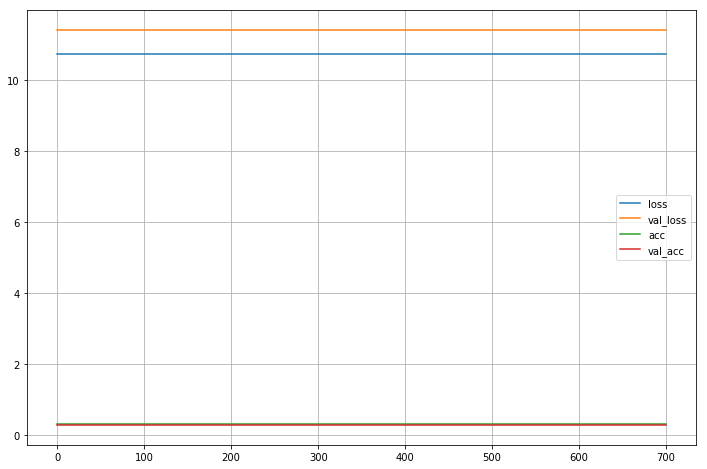

30/30 [==============================] - 0s 32us/step
Accuracy = 0.37


In [16]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf



# seed 값 설정
seed = 21
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 입력

df = pd.read_csv('../dataset/customerdata.csv')
df.columns=df.columns.str.lower()
df.head()

# 그래프로 확인

sns.pairplot(df, hue='custtype');

plt.show()

from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,1:5].values
y = df.iloc[:,5].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=700)
#train model
hist = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stopping_monitor])

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))